# COCO Dataset

In [1]:
import sys
sys.path.append('../')

from ssd_data import augmentations, transforms, target_transforms
from text_data import datasets, target_transforms as text_ttransforms

In [2]:
augmentation = None

transform = transforms.Compose(
    [transforms.ToTensor(),
     #transforms.Normalize(rgb_means=(0.485, 0.456, 0.406), rgb_stds=(0.229, 0.224, 0.225))]
    ]
)
target_transform = target_transforms.Compose(
    [target_transforms.ToCentroids(),
     target_transforms.ToTensor()]
)
train_dataset = datasets.COCO2014Text_Dataset(ignore=text_ttransforms.Ignore(illegible=True), transform=transform, target_transform=target_transform, augmentation=None)


loading annotations into memory...
0:00:01.728258
creating index...
index created!


In [3]:
from ssd.core.boxes import centroids2corners
from ssd.core.inference import toVisualizeRectangleRGBimg

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2

(['elkus.com', 'brianeleus'],)


<IPython.core.display.Javascript object>


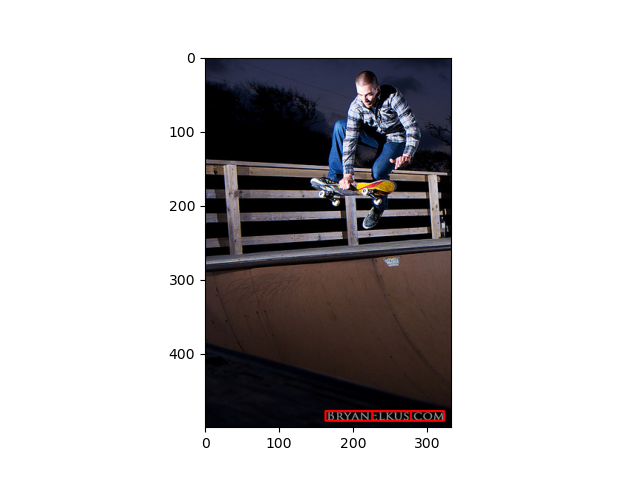

(['Bus', 'big', 'tour', 'big', 'Bus', 'Tours', 'Tours', 'BIG', 'Tour', '', 'bus', 'the', 'sightseer', 'Of', 'London', 'Tours', 'Sightseeing'],)


<IPython.core.display.Javascript object>


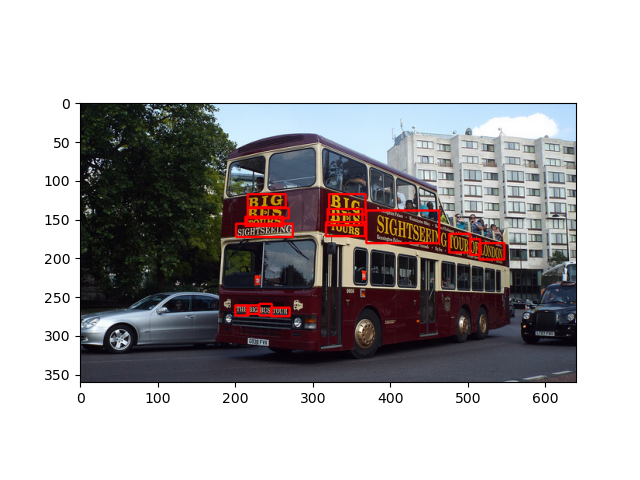

(['', '', '3', ''],)


<IPython.core.display.Javascript object>


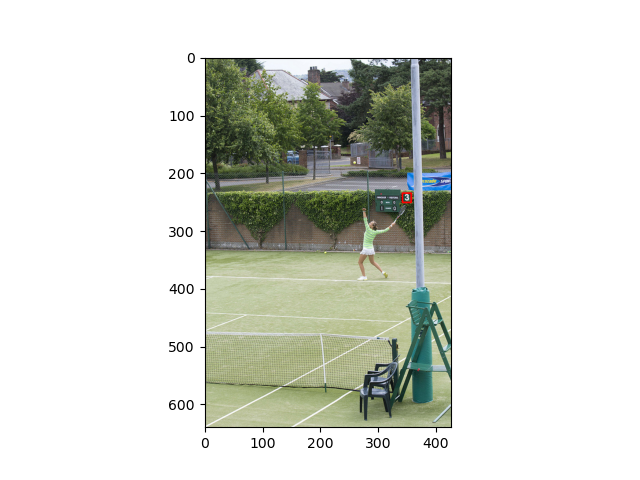

(['HAMMERTINEI', 'stop'],)


<IPython.core.display.Javascript object>


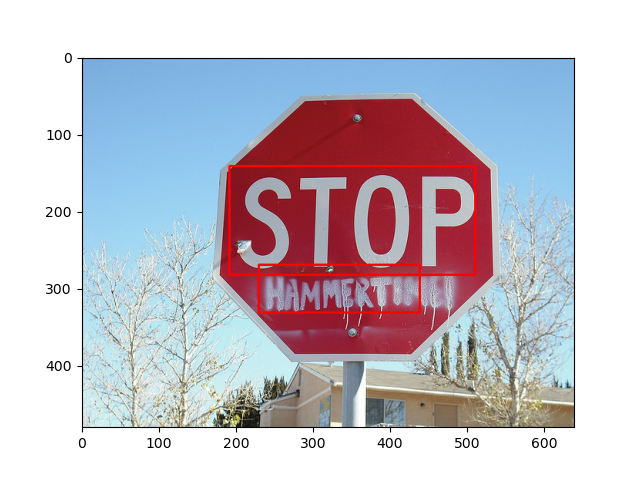

(['4', '', 'YAMAHA'],)


<IPython.core.display.Javascript object>


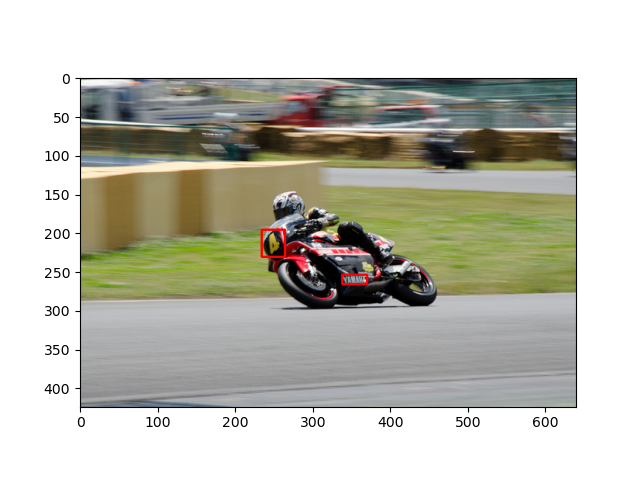

(['ambika', 'medical', 'chemist', 'gupta', 'surgical', '', 'chemist', '', '', '', '', ''],)


<IPython.core.display.Javascript object>


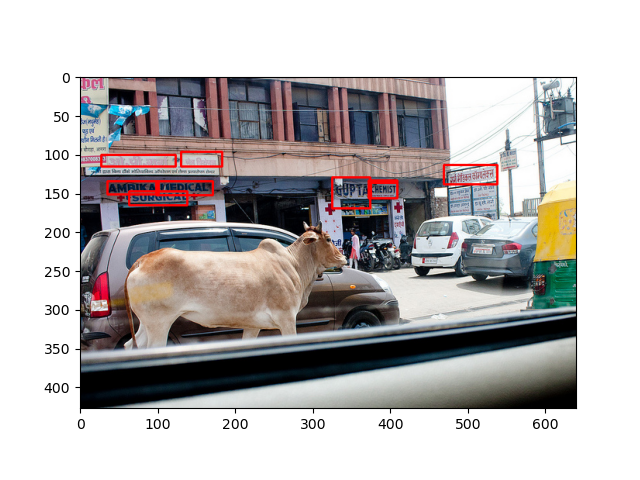

(['stop', 'AYS', 'trays'],)


<IPython.core.display.Javascript object>


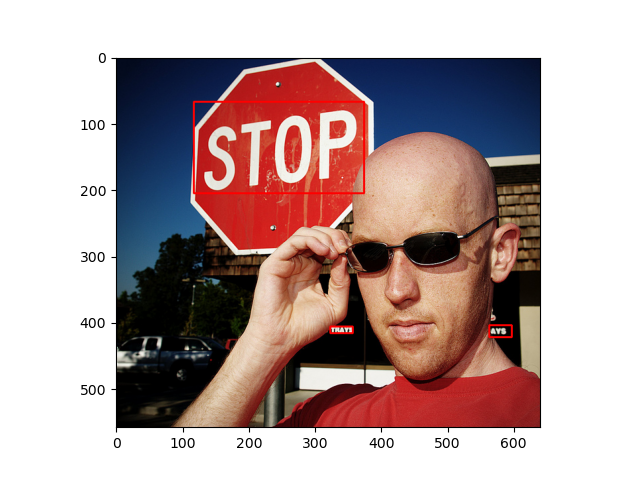

(['junior'],)


<IPython.core.display.Javascript object>


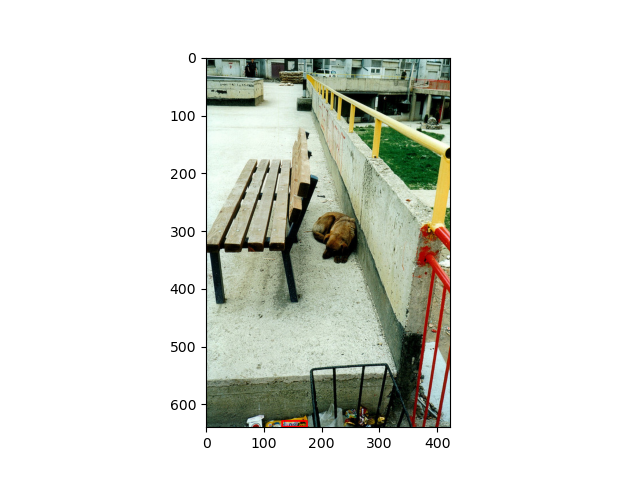

(['', '545', 'sound', '9585k', 'redmond', '', 'sale', 'day', 'one'],)


<IPython.core.display.Javascript object>


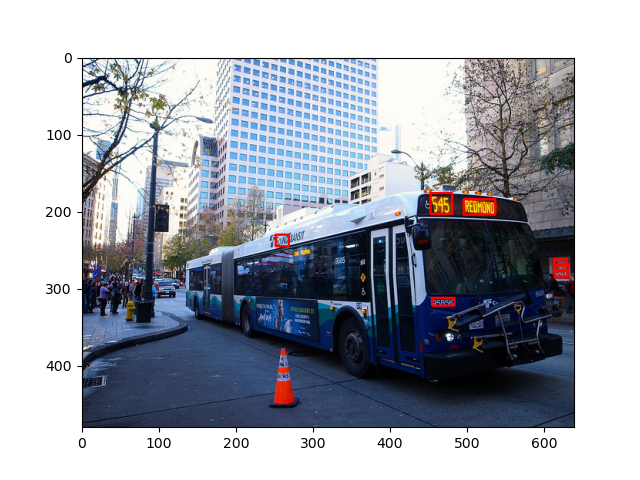

(['sun', 'the', 'orioles'],)


<IPython.core.display.Javascript object>


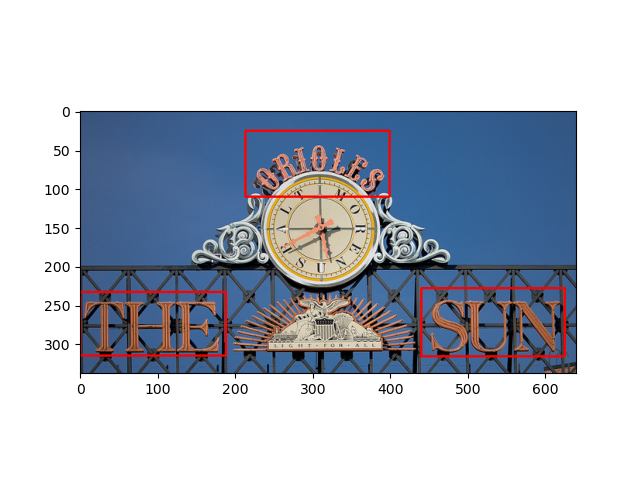

(['communications!?', 'much', 'too', 'Mourtzio', '', 'abbate', 'occhiovivo', 'comunications?'],)


<IPython.core.display.Javascript object>


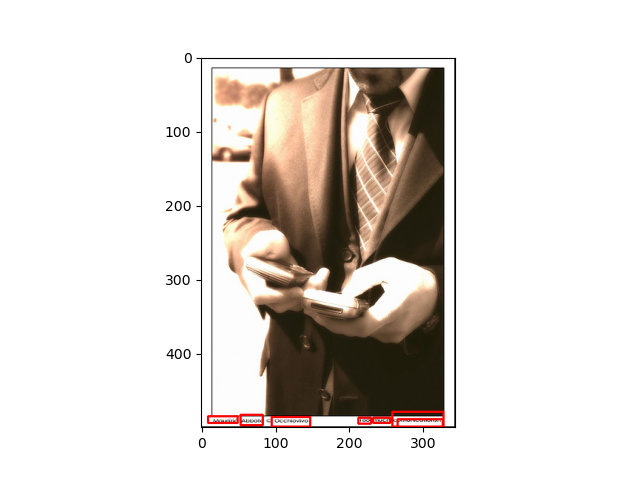

(['potable', 'water', 'drink', 'beber', 'not', 'prohibe', 'non', 'se', 'el', 'do', 'agua'],)


<IPython.core.display.Javascript object>


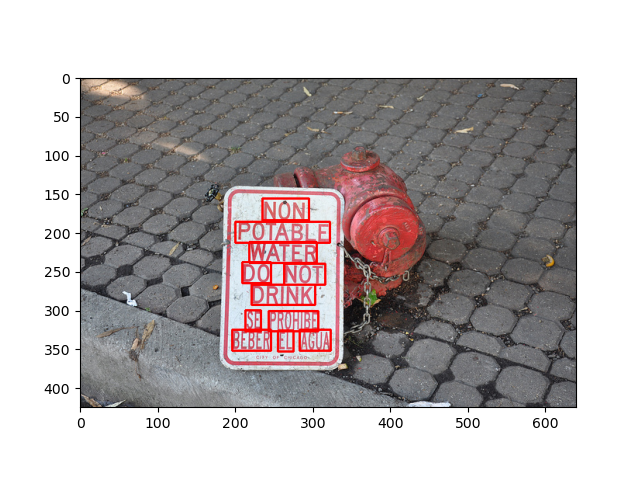

(["ODELL'S", 'to', 'RTING', 'co', 'SPORTING', 'GOODS', "Mo's", 'gotta', '13'],)


<IPython.core.display.Javascript object>


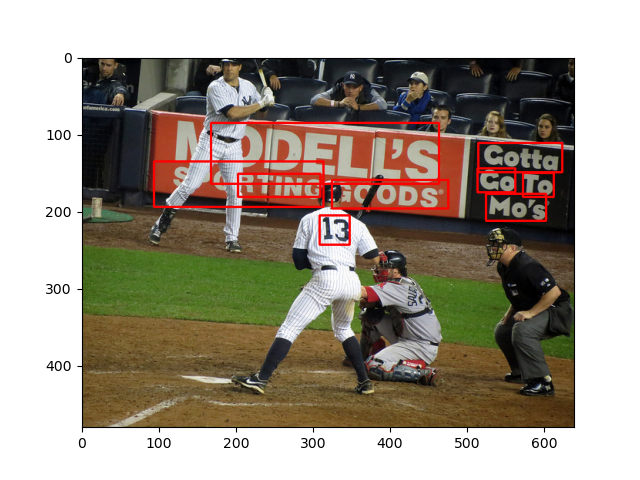

(['stop', 'ch'],)


<IPython.core.display.Javascript object>


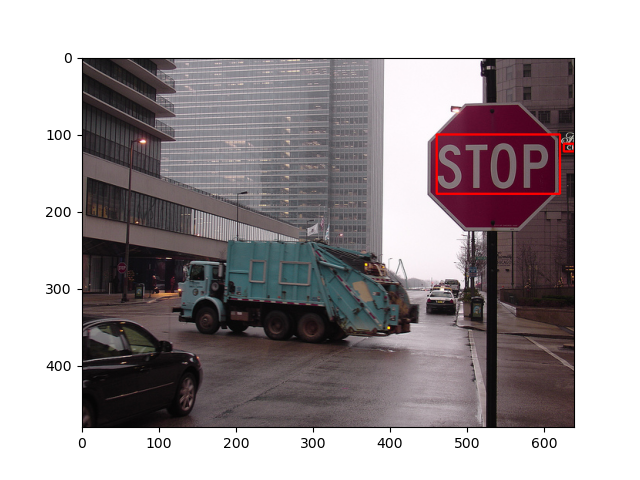

(['md%', '3446'],)


<IPython.core.display.Javascript object>


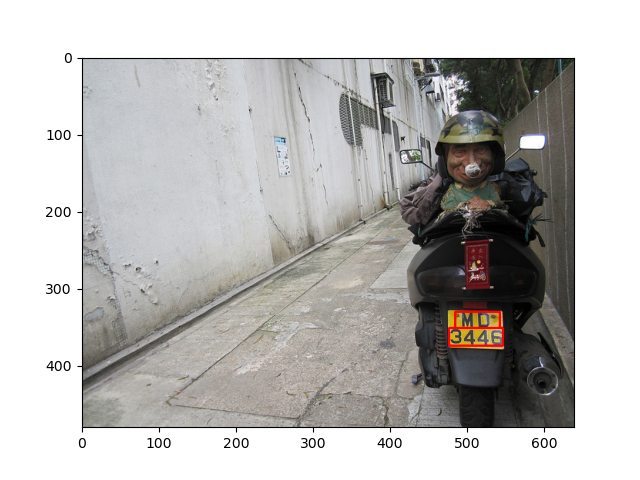

In [5]:
indices = np.random.randint(0, len(train_dataset), 15)

for index in indices:
    img, (targets, texts) = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleRGBimg(img, locs, verbose=False)
    print(texts)
    plt.figure()
    plt.imshow(img)